In [1]:
#________________________________IMPORT_______________________________________#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from datetime import datetime, timedelta, date
import matplotlib.dates as mdates

#___________________________IMPORT DATA FROM FILE_____________________________#

# calibrated data for the weekdays
data = pd.read_csv(r'C:/Users/athen/PythonMasterProject/Stable Isotopes/Project/Data/Calibrated_10s_CO2_iso_weekdays_data.csv', parse_dates=['DATE_TIME'])

# raw data for the weekdays
data_raw = pd.read_csv(r'C:/Users/athen/PythonMasterProject/Stable Isotopes/Project/Data/RAW_CO2_iso_weekdays_data.csv', parse_dates=['DATE_TIME'])

# calibrated data for the weekend
data_wk = pd.read_csv(r'C:/Users/athen/PythonMasterProject/Stable Isotopes/Project/Data/Calibrated_10s_CO2_iso_weekend_data.csv', parse_dates=['DATE_TIME'])

# raw data for the weekend
data_raw_wk = pd.read_csv(r'C:/Users/athen/PythonMasterProject/Stable Isotopes/Project/Data/RAW_CO2_iso_weekend_data.csv', parse_dates=['DATE_TIME'])

### DIURNAL CYCLE PLOTS

#### Raw - weekdays

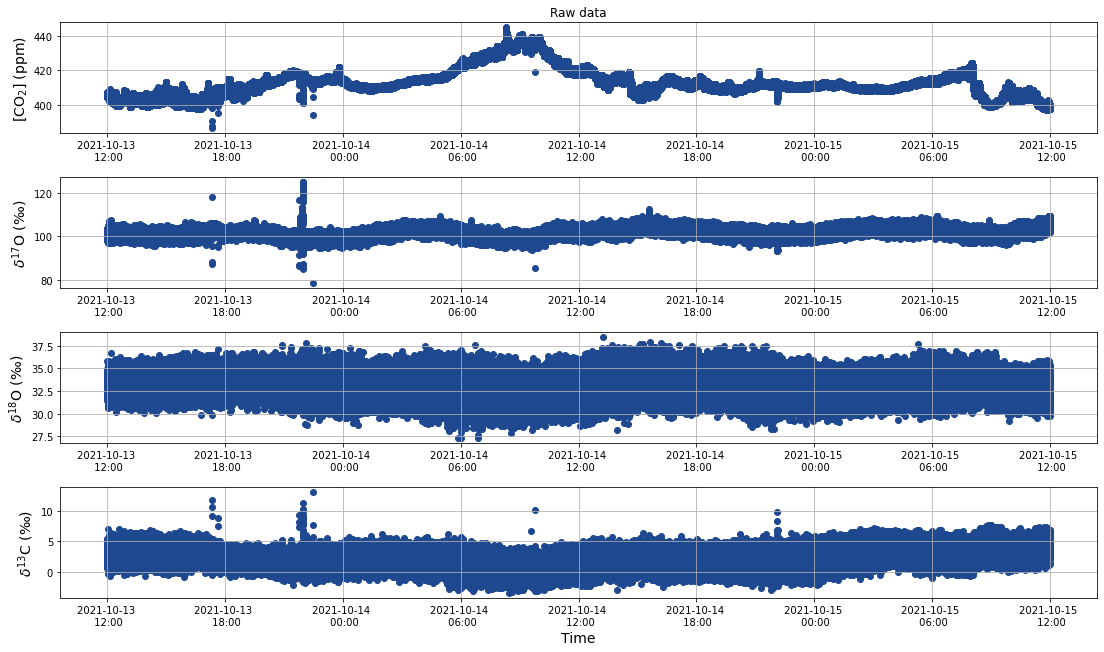

In [19]:
#________________________________DIURNAL CYCLE PLOT FOR WEEKDAYS RAW DATA 10Hz_______________________________________#

fig, axs = plt.subplots(4, 1,figsize=(18,10))

axs[0].set_ylabel('[CO$_2$] (ppm)' ,fontsize=14)
axs[0].set_title('Raw data')
axs[0].scatter(data_raw.DATE_TIME,data_raw.CO2, c='#1e488f')
axs[0].grid()

axs[1].set_ylabel("$\delta^{17}$O (\u2030)", fontsize=14)
axs[1].scatter(data_raw.DATE_TIME, data_raw.d627, c='#1e488f')
axs[1].grid()

axs[2].set_ylabel("$\delta^{18}$O (\u2030)", fontsize=14)
axs[2].scatter(data_raw.DATE_TIME, data_raw.d628, c='#1e488f')
axs[2].grid()

axs[3].set_xlabel('Time',fontsize=14)
axs[3].set_ylabel("$\delta^{13}$C (\u2030)", fontsize=14)
axs[3].scatter(data_raw.DATE_TIME, data_raw.d636, c='#1e488f')
axs[3].grid()

# date format
myFmt = mdates.DateFormatter('%Y-%m-%d \n %H:%M')
for i in range(4):
    axs[i].xaxis.set_major_formatter(myFmt)
    plt.setp(axs[i].get_xticklabels(), rotation = 0)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('plots_for_report/raw_diurnal_cycle_weekdays.png', bbox_inches="tight")

#### Calibrated - weekdays

No handles with labels found to put in legend.


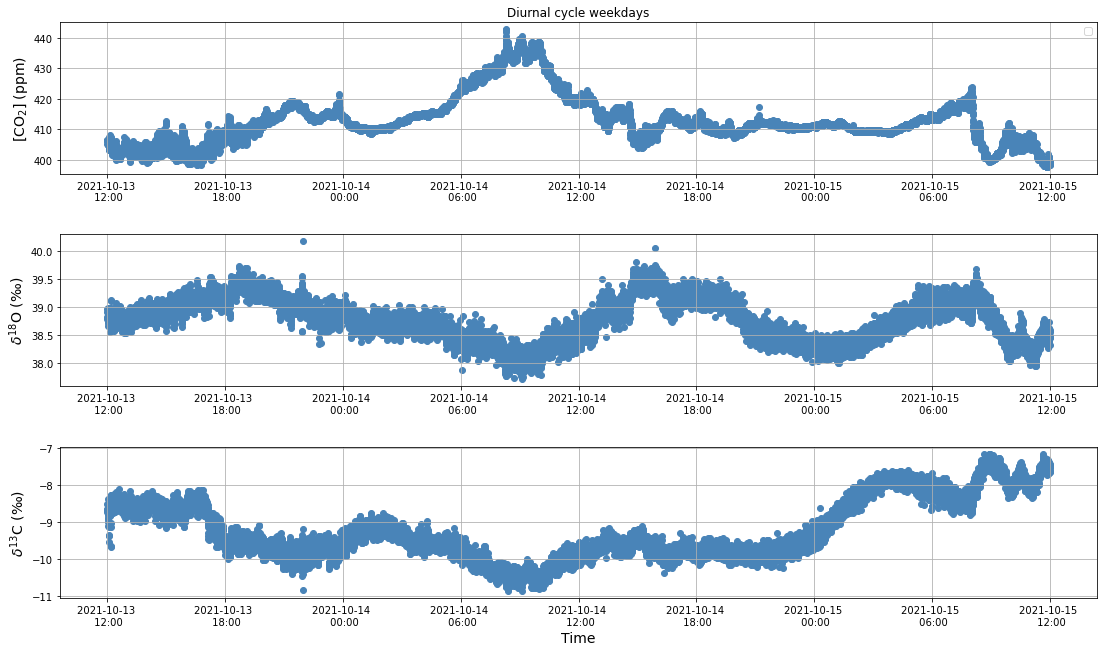

In [20]:
# our data consists of measurements every 10sec. Now we average the data in order to only have measurements per 1min and 3min
# from: https://stackoverflow.com/questions/43272695/average-data-over-time

#___________________________________________________________________________________________#
CO2_average_1min = []
d627_cal_average_1min = []
d628_cal_average_1min = []
d636_cal_average_1min = []
for i in range(6, len(data.CO2) + 1, 6):
    CO2_average_1min.append(np.average(data.CO2[(i - 6):i]))
    d627_cal_average_1min.append(np.average(data.d627_cal[(i - 6):i]))
    d628_cal_average_1min.append(np.average(data.d628_cal[(i - 6):i]))
    d636_cal_average_1min.append(np.average(data.d636_cal[(i - 6):i]))
    
CO2_average_1min = np.array(CO2_average_1min)
d627_cal_average_1min = np.array(d627_cal_average_1min)
d628_cal_average_1min = np.array(d628_cal_average_1min)
d636_cal_average_1min = np.array(d636_cal_average_1min)

# time array
time = np.arange(datetime(2021,10,13,12,0,10), datetime(2021,10,15,12,0,10), timedelta(minutes=1)).astype(datetime)

#___________________________________________________________________________________________#

CO2_average_3min = []
d627_cal_average_3min = []
d628_cal_average_3min = []
d636_cal_average_3min = []
for i in range(18, len(data.CO2) + 1, 18):
    CO2_average_3min.append(np.average(data.CO2[(i - 18):i]))
    d627_cal_average_3min.append(np.average(data.d627_cal[(i - 18):i]))
    d628_cal_average_3min.append(np.average(data.d628_cal[(i - 18):i]))
    d636_cal_average_3min.append(np.average(data.d636_cal[(i - 18):i]))
    
CO2_average_3min = np.array(CO2_average_3min)
d627_cal_average_3min = np.array(d627_cal_average_3min)
d628_cal_average_3min = np.array(d628_cal_average_3min)
d636_cal_average_3min = np.array(d636_cal_average_3min)

t = np.arange(datetime(2021,10,13,12,0,10), datetime(2021,10,15,12,0,10), timedelta(minutes=3)).astype(datetime)

#___________________________________________________________________________________________#

fig, axs = plt.subplots(3, 1,figsize=(18,10))

axs[0].set_ylabel('[CO$_2$] (ppm)' ,fontsize=14)
axs[0].set_title('Diurnal cycle weekdays')
axs[0].scatter(data.DATE_TIME,data.CO2, c='#4984b8')
#axs[0].scatter(time,CO2_average_1min, c='b',label='1min averaged data')
#axs[0].scatter(t,CO2_average_3min, c='#cf0234',label='3min averaged data')
axs[0].grid()
axs[0].legend()

axs[1].set_ylabel("$\delta^{18}$O (\u2030)", fontsize=14)
axs[1].scatter(data.DATE_TIME, data.d628_cal, c='#4984b8')
#axs[1].scatter(time, d628_cal_average_1min, c='b')
#axs[1].scatter(t, d628_cal_average_3min, c='#cf0234')
axs[1].grid()

axs[2].set_xlabel('Time',fontsize=14)
axs[2].set_ylabel("$\delta^{13}$C (\u2030)", fontsize=14)
axs[2].scatter(data.DATE_TIME, data.d636_cal, c='#4984b8')
#axs[2].scatter(time, d636_cal_average_1min, c='b')
#axs[2].scatter(t, d636_cal_average_3min, c='#cf0234')
axs[2].grid()

# date format
myFmt = mdates.DateFormatter('%Y-%m-%d \n %H:%M')
for i in range(3):
    axs[i].xaxis.set_major_formatter(myFmt)
    plt.setp(axs[i].get_xticklabels(), rotation = 0)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('plots_for_report/cal_diurnal cycle_wdays.png', bbox_inches="tight")

#### Calibrated - weekend

No handles with labels found to put in legend.


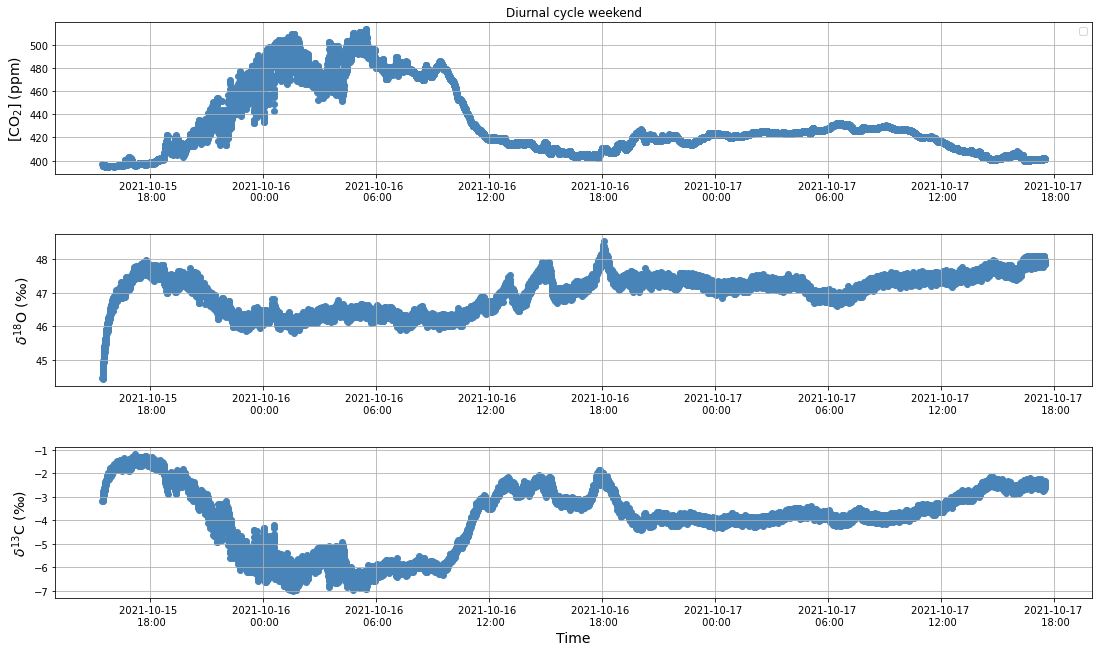

In [21]:
fig, axs = plt.subplots(3, 1,figsize=(18,10))

axs[0].set_ylabel('[CO$_2$] (ppm)' ,fontsize=14)
axs[0].set_title('Diurnal cycle weekend')
axs[0].scatter(data_wk.DATE_TIME,data_wk.CO2, c='#4984b8')
#axs[0].scatter(time,CO2_average_1min, c='b',label='1min averaged data')
#axs[0].scatter(t,CO2_average_3min, c='#cf0234',label='3min averaged data')
axs[0].grid()
axs[0].legend()

axs[1].set_ylabel("$\delta^{18}$O (\u2030)", fontsize=14)
axs[1].scatter(data_wk.DATE_TIME, data_wk.d628_cal, c='#4984b8')
#axs[1].scatter(time, d628_cal_average_1min, c='b')
#axs[1].scatter(t, d628_cal_average_3min, c='#cf0234')
axs[1].grid()

axs[2].set_xlabel('Time',fontsize=14)
axs[2].set_ylabel("$\delta^{13}$C (\u2030)", fontsize=14)
axs[2].scatter(data_wk.DATE_TIME, data_wk.d636_cal, c='#4984b8')
#axs[2].scatter(time, d636_cal_average_1min, c='b')
#axs[2].scatter(t, d636_cal_average_3min, c='#cf0234')
axs[2].grid()

# date format
myFmt = mdates.DateFormatter('%Y-%m-%d \n %H:%M')
for i in range(3):
    axs[i].xaxis.set_major_formatter(myFmt)
    plt.setp(axs[i].get_xticklabels(), rotation = 0)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('plots_for_report/cal_diurnal cycle_wend.png', bbox_inches="tight")

####  Diurnal cycle - CO2 concetration only

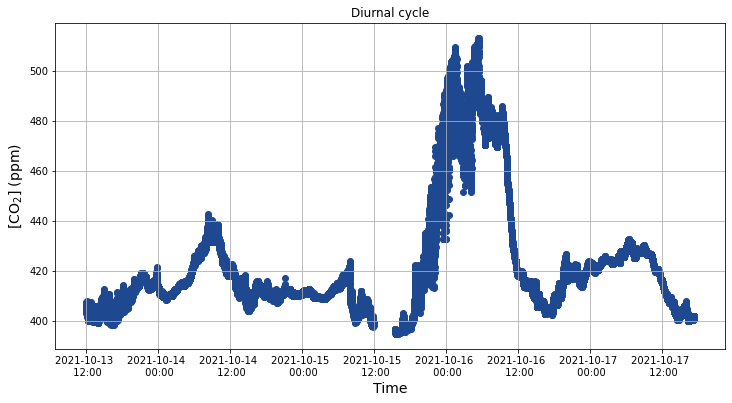

In [22]:
fig, axs = plt.subplots(1, 1,figsize=(12,6))

axs.set_ylabel('[CO$_2$] (ppm)' ,fontsize=14)
axs.set_xlabel('Time' ,fontsize=14)
axs.set_title('Diurnal cycle')
axs.scatter(data.DATE_TIME, data.CO2, c='#1e488f')
axs.scatter(data_wk.DATE_TIME, data_wk.CO2, c='#1e488f')
axs.grid()

# date format
myFmt = mdates.DateFormatter('%Y-%m-%d \n %H:%M')
axs.xaxis.set_major_formatter(myFmt)
plt.setp(axs.get_xticklabels(), rotation = 0)

plt.savefig('plots_for_report/diurnal cycle_all_days.png', bbox_inches="tight")

# Keeling plots

#### 1st event

(array([5039], dtype=int64),)
(array([7919], dtype=int64),)
(array([7919], dtype=int64),)
(array([9719], dtype=int64),)


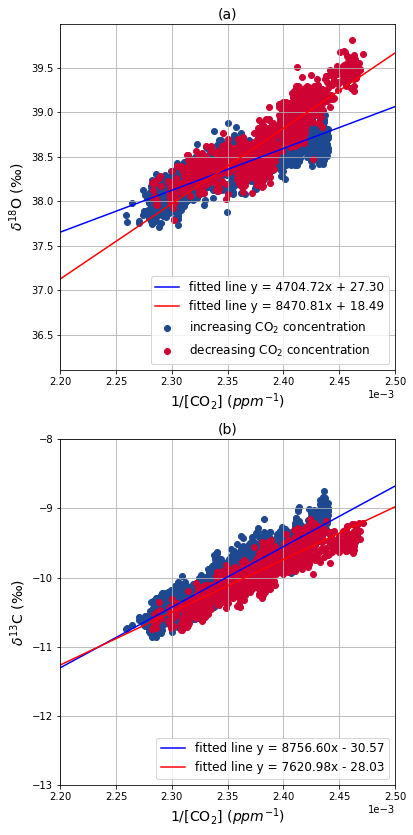

In [23]:
# find the index for rising part period of time 
print(np.where(data.DATE_TIME == np.datetime64(datetime(2021,10,14,2,0,0))))
print(np.where(data.DATE_TIME == np.datetime64(datetime(2021,10,14,10,0,0))))

# find the index for falling part period of time
print(np.where(data.DATE_TIME == np.datetime64(datetime(2021,10,14,10,0,0))))
print(np.where(data.DATE_TIME == np.datetime64(datetime(2021,10,14,15,0,0))))

# get the data for only these hours
CO2_1 = data.CO2[5039:7919]
d628_1 = data.d628_cal[5039:7919]
d636_1 = data.d636_cal[5039:7919]

CO2_2 = data.CO2[7920:9719]
d628_2 = data.d628_cal[7920:9719]
d636_2 = data.d636_cal[7920:9719]


# fitting 
#______________________________________________________________________________________________________________________#
    
slope_628, intercept_628, r_value_628, p_value_628, std_err_628 = stats.linregress(1/CO2_1, d628_1) 

d628_fit = []; x628_fit = np.linspace(0.0021, 0.0025,100)
for i in x628_fit:
    ynew=intercept_628+slope_628*i
    d628_fit.append(ynew)   
d628_fit = np.array(d628_fit)

#Compute the standard deviation 
p_628, v_628 = np.polyfit(1/CO2_1, d628_1, 1, cov=True)

x = 1/CO2_1
mx = x.mean()
sx2 = np.sum((x-mx)**2)
sd_intercept_628 = std_err_628*np.sqrt(1./len(x) + mx*mx/sx2)
sd_slope_628 = std_err_628*np.sqrt(1./sx2)


#______________________________________________________________________________________________________________________#
    
slope_628_2, intercept_628_2, r_value_628_2, p_value_628_2, std_err_628_2 = stats.linregress(1/CO2_2, d628_2) 

d628_fit_2 = []; x628_fit_2 = np.linspace(0.0021, 0.0025,100)
for i in x628_fit_2:
    ynew_2=intercept_628_2+slope_628_2*i
    d628_fit_2.append(ynew_2)   
d628_fit_2 = np.array(d628_fit_2)

#Compute the standard deviation 
p_628_2, v_628_2 = np.polyfit(1/CO2_2, d628_2, 1, cov=True)

x = 1/CO2_1
mx = x.mean()
sx2 = ((x-mx)**2).sum()
sd_intercept_628_2 = std_err_628_2*np.sqrt(1./len(x) + mx*mx/sx2)
sd_slope_628_2 = std_err_628_2*np.sqrt(1./sx2)

#______________________________________________________________________________________________________________________#

slope_636, intercept_636, r_value_636, p_value_636, std_err_636 = stats.linregress(1/CO2_1, d636_1) 

d636_fit = []; x636_fit = np.linspace(0, 0.0025,100)
for i in x636_fit:
    ynew=intercept_636+slope_636*i
    d636_fit.append(ynew)   
d636_fit = np.array(d636_fit)

#Compute the standard deviation 
p_636, v_636 = np.polyfit(1/CO2_1, d636_1, 1, cov=True)

#______________________________________________________________________________________________________________________#

slope_636_2, intercept_636_2, r_value_636_2, p_value_636_2, std_err_636_2 = stats.linregress(1/CO2_2, d636_2) 

d636_fit_2 = []; x636_fit_2 = np.linspace(0, 0.0025,100)
for i in x636_fit_2:
    ynew_2=intercept_636_2+slope_636_2*i
    d636_fit_2.append(ynew_2)   
d636_fit_2 = np.array(d636_fit_2)

#Compute the standard deviation 
p_636_2, v_636_2 = np.polyfit(1/CO2_2, d636_2, 1, cov=True)

#______________________________________________________________________________________________________________________#

fig, axs = plt.subplots(2, 1,figsize=(6,14))

axs[0].set_xlabel('1/[CO$_2$] ($ppm^{-1}$)',fontsize=14)
axs[0].set_ylabel('$\delta^{18}$O (\u2030)' ,fontsize=14)
axs[0].set_title('(a)' ,fontsize=14)
#axs[0].set_title('628')
axs[0].scatter(1/CO2_1, d628_1, c='#1e488f',label='increasing CO$_2$ concentration')
axs[0].scatter(1/CO2_2, d628_2, c='#cf0234',label='decreasing CO$_2$ concentration')
axs[0].plot(x628_fit, d628_fit, 'b', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628, intercept_628))
axs[0].plot(x628_fit_2, d628_fit_2, 'r', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628_2, intercept_628_2))
axs[0].grid()
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlim([0.0022,0.0025])
axs[0].legend(loc=4,fontsize=12)

axs[1].set_xlabel('1/[CO$_2$] ($ppm^{-1}$)',fontsize=14)
axs[1].set_ylabel('$\delta^{13}$C (\u2030)' ,fontsize=14)
axs[1].set_title('(b)' ,fontsize=14)
#axs[1].set_title('636')
axs[1].scatter(1/CO2_1, d636_1, c='#1e488f')
axs[1].scatter(1/CO2_2, d636_2, c='#cf0234')
axs[1].plot(x636_fit, d636_fit, 'b', label='fitted line y = {:1.2f}x - {:1.2f}'.format(slope_636, abs(intercept_636)))
axs[1].plot(x636_fit_2, d636_fit_2, 'r', label='fitted line y = {:1.2f}x - {:1.2f}'.format(slope_636_2, abs(intercept_636_2)))
axs[1].grid()
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[1].set_xlim([0.0022,0.0025])
axs[1].set_ylim([-13,-8])
axs[1].legend(loc=4,fontsize=12)

#plt.suptitle('First peak (rising part from 2021-10-14 2:00:00 until 2021-10-14 10:00:00)')

#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('plots_for_report/1st peak_keeling.png', bbox_inches="tight")

#### 2nd event

(array([179], dtype=int64),)
(array([4859], dtype=int64),)
(array([4859], dtype=int64),)
(array([8819], dtype=int64),)


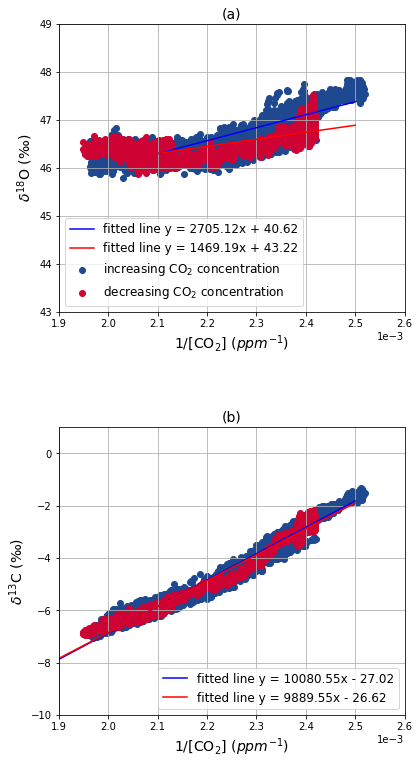

In [25]:
# find the index for these hours
print(np.where(data_wk.DATE_TIME == np.datetime64(datetime(2021,10,15,16,0,0))))
print(np.where(data_wk.DATE_TIME == np.datetime64(datetime(2021,10,16,5,0,0))))

# find the index for the falling part period of time
print(np.where(data_wk.DATE_TIME == np.datetime64(datetime(2021,10,16,5,0,0))))
print(np.where(data_wk.DATE_TIME == np.datetime64(datetime(2021,10,16,16,0,0))))

# get the data for only these hours
CO2_1 = data_wk.CO2[179 + 6*60*2:4859]
d628_1 = data_wk.d628_cal[179 + 6*60*2:4859]
d636_1 = data_wk.d636_cal[179 + 6*60*2:4859]

CO2_2 = data_wk.CO2[4859:8819 - 6*60*2]
d628_2 = data_wk.d628_cal[4859:8819 - 6*60*2]
d636_2 = data_wk.d636_cal[4859:8819 - 6*60*2]

# fitting 
#______________________________________________________________________________________________________________________#
    
slope_628, intercept_628, r_value_628, p_value_628, std_err_628 = stats.linregress(1/CO2_1, d628_1) 

d628_fit = []; x628_fit = np.linspace(0.0021, 0.0025,100)
for i in x628_fit:
    ynew=intercept_628+slope_628*i
    d628_fit.append(ynew)   
d628_fit = np.array(d628_fit)

#Compute the standard deviation 
p_628, v_628 = np.polyfit(1/CO2_1, d628_1, 1, cov=True)

#______________________________________________________________________________________________________________________#
    
slope_628_2, intercept_628_2, r_value_628_2, p_value_628_2, std_err_628_2 = stats.linregress(1/CO2_2, d628_2) 

d628_fit_2 = []; x628_fit_2 = np.linspace(0.0021, 0.0025,100)
for i in x628_fit_2:
    ynew_2=intercept_628_2+slope_628_2*i
    d628_fit_2.append(ynew_2)   
d628_fit_2 = np.array(d628_fit_2)

#Compute the standard deviation 
p_628_2, v_628_2 = np.polyfit(1/CO2_2, d628_2, 1, cov=True)

#______________________________________________________________________________________________________________________#

slope_636, intercept_636, r_value_636, p_value_636, std_err_636 = stats.linregress(1/CO2_1, d636_1) 

d636_fit = []; x636_fit = np.linspace(0, 0.0025,100)
for i in x636_fit:
    ynew=intercept_636+slope_636*i
    d636_fit.append(ynew)   
d636_fit = np.array(d636_fit)

#Compute the standard deviation 
p_636, v_636 = np.polyfit(1/CO2_1, d636_1, 1, cov=True)

#______________________________________________________________________________________________________________________#

slope_636_2, intercept_636_2, r_value_636_2, p_value_636_2, std_err_636_2 = stats.linregress(1/CO2_2, d636_2) 

d636_fit_2 = []; x636_fit_2 = np.linspace(0, 0.0025,100)
for i in x636_fit_2:
    ynew_2=intercept_636_2+slope_636_2*i
    d636_fit_2.append(ynew_2)   
d636_fit_2 = np.array(d636_fit_2)

#Compute the standard deviation 
p_636_2, v_636_2 = np.polyfit(1/CO2_2, d636_2, 1, cov=True)

#______________________________________________________________________________________________________________________#

fig, axs = plt.subplots(2, 1,figsize=(6,12))

axs[0].set_xlabel('1/[CO$_2$] ($ppm^{-1}$)',fontsize=14)
axs[0].set_ylabel('$\delta^{18}$O (\u2030)' ,fontsize=14)
axs[0].set_title('(a)' ,fontsize=14)
#axs[0].set_title('628')
axs[0].scatter(1/CO2_1, d628_1, c='#1e488f',label='increasing CO$_2$ concentration')
axs[0].scatter(1/CO2_2, d628_2, c='#cf0234',label='decreasing CO$_2$ concentration')
axs[0].plot(x628_fit, d628_fit, 'b', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628, intercept_628))
axs[0].plot(x628_fit_2, d628_fit_2, 'r', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628_2, intercept_628_2))
axs[0].grid()
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlim([0.0019,0.0026])
axs[0].set_ylim([43,49])
axs[0].legend(loc=3,fontsize=12)

axs[1].set_xlabel('1/[CO$_2$] ($ppm^{-1}$)',fontsize=14)
axs[1].set_ylabel('$\delta^{13}$C (\u2030)' ,fontsize=14)
axs[1].set_title('(b)' ,fontsize=14)
#axs[1].set_title('636')
axs[1].scatter(1/CO2_1, d636_1, c='#1e488f')
axs[1].scatter(1/CO2_2, d636_2, c='#cf0234')
axs[1].plot(x636_fit, d636_fit, 'b', label='fitted line y = {:1.2f}x - {:1.2f}'.format(slope_636, abs(intercept_636)))
axs[1].plot(x636_fit_2, d636_fit_2, 'r', label='fitted line y = {:1.2f}x - {:1.2f}'.format(slope_636_2, abs(intercept_636_2)))
axs[1].grid()
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[1].set_xlim([0.0019,0.0026])
axs[1].set_ylim([-10,1])
axs[1].legend(loc=4,fontsize=12)

#plt.suptitle('First peak (rising part from 2021-10-14 2:00:00 until 2021-10-14 10:00:00)')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

plt.savefig('plots_for_report/2nd peak_keeling.png', bbox_inches="tight")

#### Splitting the rising part into two sections (same for the falling part)

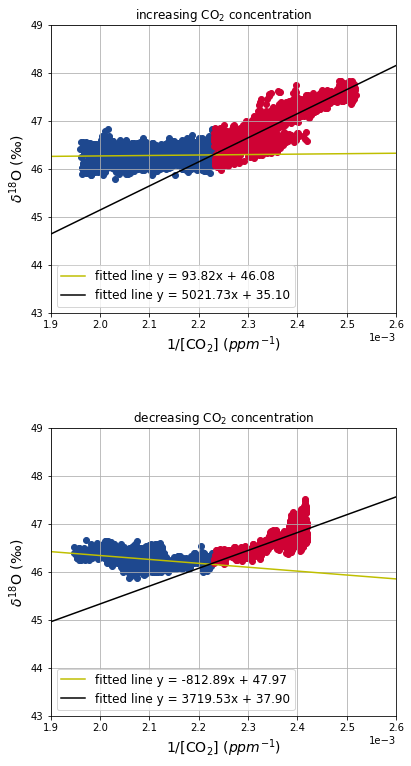

In [27]:
# get the data for only these hours
CO2_1 = data_wk.CO2[179 + 6*60*2:4859] # remove the first 2 hours 
d628_1 = data_wk.d628_cal[179 + 6*60*2:4859]
d636_1 = data_wk.d636_cal[179 + 6*60*2:4859]

CO2_2 = data_wk.CO2[4859:8819 - 6*60*2]  # remove the last 2 hours
d628_2 = data_wk.d628_cal[4859:8819 - 6*60*2]
d636_2 = data_wk.d636_cal[4859:8819 - 6*60*2]

# Fitting
d628_1_horiz = []
x_1_horz = []
d628_1_slope = []
x_1_slope = []
for i in range(len(CO2_1)):
    if 1/np.array(CO2_1)[i] >= 0.0019 and 1/np.array(CO2_1)[i]  <= 0.00223:
        d628_1_horiz.append(np.array(d628_1)[i])
        x_1_horz.append(1/np.array(CO2_1)[i])
    else:
        d628_1_slope.append(np.array(d628_1)[i])
        x_1_slope.append(1/np.array(CO2_1)[i])
        

d628_1_horiz = np.array(d628_1_horiz)
x_1_horiz = np.array(x_1_horz)
d628_1_slope = np.array(d628_1_slope)
x_1_slope = np.array(x_1_slope) 




#______________________________________________________________________________________________________________________#
    
slope_628_horiz, intercept_628_horiz, r_value_628_horiz, p_value_628_horiz, std_err_628_horiz = stats.linregress(x_1_horiz, d628_1_horiz) 

d628_fit_horiz = []; x628_fit_horiz = np.linspace(0.0019,  0.0026,100)
for i in x628_fit_horiz:
    ynew=intercept_628_horiz+slope_628_horiz*i
    d628_fit_horiz.append(ynew)   
d628_fit_horiz = np.array(d628_fit_horiz)

#Compute the standard deviation 
p_628_horiz, v_628_horiz = np.polyfit(x_1_horz, d628_1_horiz, 1, cov=True)

#______________________________________________________________________________________________________________________#
    
slope_628_slope, intercept_628_slope, r_value_628_slope, p_value_628_slope, std_err_628_slope = stats.linregress(x_1_slope, d628_1_slope) 

d628_fit_slope = []; x628_fit_slope = np.linspace(0.0019,  0.0026,100)
for i in x628_fit_slope:
    ynew_2=intercept_628_slope+slope_628_slope*i
    d628_fit_slope.append(ynew_2)   
d628_fit_slope = np.array(d628_fit_slope)

#Compute the standard deviation 
p_628_slope, v_628_slope = np.polyfit(x_1_slope, d628_1_slope, 1, cov=True)


d628_2_horiz = []
x_2_horz = []
d628_2_slope = []
x_2_slope = []
for i in range(len(CO2_2)):
    if 1/np.array(CO2_2)[i] >= 0.0019 and 1/np.array(CO2_2)[i]  <= 0.00223:
        d628_2_horiz.append(np.array(d628_2)[i])
        x_2_horz.append(1/np.array(CO2_2)[i])
    else:
        d628_2_slope.append(np.array(d628_2)[i])
        x_2_slope.append(1/np.array(CO2_2)[i])
        

d628_2_horiz = np.array(d628_2_horiz)
x_2_horiz = np.array(x_2_horz)
d628_2_slope = np.array(d628_2_slope)
x_2_slope = np.array(x_2_slope)


#______________________________________________________________________________________________________________________#
    
slope_628_horiz2, intercept_628_horiz2, r_value_628_horiz2, p_value_628_horiz2, std_err_628_horiz2 = stats.linregress(x_2_horiz, d628_2_horiz) 

d628_fit_horiz2 = []; x628_fit_horiz2 = np.linspace(0.0019,  0.0026,100)
for i in x628_fit_horiz2:
    ynew=intercept_628_horiz2+slope_628_horiz2*i
    d628_fit_horiz2.append(ynew)   
d628_fit_horiz2 = np.array(d628_fit_horiz2)

#Compute the standard deviation 
p_628_horiz2, v_628_horiz2 = np.polyfit(x_2_horz, d628_2_horiz, 1, cov=True)

#______________________________________________________________________________________________________________________#
    
slope_628_slope2, intercept_628_slope2, r_value_628_slope2, p_value_628_slope2, std_err_628_slope2 = stats.linregress(x_2_slope, d628_2_slope) 

d628_fit_slope2 = []; x628_fit_slope2 = np.linspace(0.0019,  0.0026,100)
for i in x628_fit_slope2:
    ynew_2=intercept_628_slope2+slope_628_slope2*i
    d628_fit_slope2.append(ynew_2)   
d628_fit_slope2 = np.array(d628_fit_slope2)

#Compute the standard deviation 
p_628_slope2, v_628_slope2 = np.polyfit(x_2_slope, d628_2_slope, 1, cov=True)



fig, axs = plt.subplots(2, 1,figsize=(6,12))

axs[0].set_xlabel('1/[CO$_2$] ($ppm^{-1}$)',fontsize=14)
axs[0].set_ylabel('$\delta^{18}$O (\u2030)' ,fontsize=14)
axs[0].set_title('increasing CO$_2$ concentration')
axs[0].scatter(x_1_horiz, d628_1_horiz, c='#1e488f')
axs[0].scatter(x_1_slope, d628_1_slope, c='#cf0234')
axs[0].plot(x628_fit_horiz, d628_fit_horiz, 'y', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628_horiz, intercept_628_horiz))
axs[0].plot(x628_fit_slope, d628_fit_slope, 'k', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628_slope, intercept_628_slope))
axs[0].grid()
axs[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlim([0.0019,0.0026])
axs[0].set_ylim([43,49])
axs[0].legend(loc=3,fontsize=12)

axs[1].set_xlabel('1/[CO$_2$] ($ppm^{-1}$)',fontsize=14)
axs[1].set_ylabel('$\delta^{18}$O (\u2030)' ,fontsize=14)
axs[1].set_title('decreasing CO$_2$ concentration')
axs[1].scatter(x_2_horiz, d628_2_horiz, c='#1e488f')
axs[1].scatter(x_2_slope, d628_2_slope, c='#cf0234')
axs[1].plot(x628_fit_horiz2, d628_fit_horiz2, 'y', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628_horiz2, intercept_628_horiz2))
axs[1].plot(x628_fit_slope2, d628_fit_slope2, 'k', label='fitted line y = {:1.2f}x + {:1.2f}'.format(slope_628_slope2, intercept_628_slope2))
axs[1].grid()
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[1].set_xlim([0.0019,0.0026])
axs[1].set_ylim([43,49])
axs[1].legend(loc=3,fontsize=12)

plt.savefig('plots_for_report/2nd peak_keeling_split18O.png', bbox_inches="tight")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)